#Drugs, Side Effects and Medical Conditions
Mustafiz Ahmed UMID05072548678

In [1]:
# Mounting my Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing all the libraries I'll need for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset from my Google Drive
file_path = '/content/drive/MyDrive/UM_Drugs_Side_Effects_and_Medical_Conditions/drugs_side_effects_drugs_com.csv'
data = pd.read_csv(file_path)

# Checking the shape of my dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 2931 rows and 17 columns


In [4]:
# Checking all the column names in my dataset
print("Columns in the dataset:")
print(data.columns.tolist())
print()

# Looking at the first 5 rows to understand the data
print("First 5 rows of the dataset:")
data.head()

Columns in the dataset:
['drug_name', 'medical_condition', 'side_effects', 'generic_name', 'drug_classes', 'brand_names', 'activity', 'rx_otc', 'pregnancy_category', 'csa', 'alcohol', 'related_drugs', 'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link', 'medical_condition_url']

First 5 rows of the dataset:


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [5]:
# Checking the data types and non-null counts for each column
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_descripti

In [6]:
# Checking how many missing values are in each column
print("Missing values in each column:")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing values in each column:
                    Missing Count  Percentage
alcohol                      1554   53.019447
related_drugs                1469   50.119413
no_of_reviews                1345   45.888775
rating                       1345   45.888775
brand_names                  1213   41.385193
pregnancy_category            229    7.813033
side_effects                  124    4.230638
drug_classes                   82    2.797680
generic_name                   43    1.467076
rx_otc                          1    0.034118


In [7]:
# Checking if there are any duplicate rows in my dataset
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows found:")
    print(data[data.duplicated()])
else:
    print("\nNo duplicate rows found in the dataset")

Number of duplicate rows: 0

No duplicate rows found in the dataset


In [8]:
# Getting basic statistical summary of numerical columns
print("Statistical summary of numerical columns:")
data.describe()

Statistical summary of numerical columns:


,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


In [9]:
# Dropping brand_names column as it has too many missing values
data.drop(columns=['brand_names'], inplace=True)
print(f"Dataset shape after dropping brand_names: {data.shape}")
print(f"Remaining columns: {data.shape[1]}")

Dataset shape after dropping brand_names: (2931, 16)
Remaining columns: 16


In [10]:
# Converting activity column from percentage string to decimal
# Removing % sign and converting to float
data['activity'] = data['activity'].str.replace('%', '').astype(float) / 100

print("Activity column after conversion:")
print(data['activity'].head(10))
print(f"\nData type: {data['activity'].dtype}")

Activity column after conversion:
0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
5    0.35
6    0.30
7    0.26
8    0.20
9    0.17
Name: activity, dtype: float64

Data type: float64


In [11]:
# In alcohol column, X means interaction with alcohol and NaN means no interaction
# Converting X to 1 and NaN to 0 for easier analysis
data['alcohol'] = data['alcohol'].replace('X', 1)
data['alcohol'] = data['alcohol'].fillna(0)
data['alcohol'] = data['alcohol'].astype(int)

print("Alcohol column after conversion:")
print(data['alcohol'].value_counts())

Alcohol column after conversion:
alcohol
0    1554
1    1377
Name: count, dtype: int64


In [12]:
# Filling missing values with 'Unknown' for categorical columns
data['side_effects'] = data['side_effects'].fillna('Unknown')
data['generic_name'] = data['generic_name'].fillna('Unknown')
data['drug_classes'] = data['drug_classes'].fillna('Unknown')
data['related_drugs'] = data['related_drugs'].fillna('Unknown')
data['rx_otc'] = data['rx_otc'].fillna('Unknown')
data['pregnancy_category'] = data['pregnancy_category'].fillna('Unknown')

# Filling missing values with 0 for numerical columns
data['rating'] = data['rating'].fillna(0)
data['no_of_reviews'] = data['no_of_reviews'].fillna(0)

print("Missing values after filling:")
print(data.isnull().sum().sum())

Missing values after filling:
0


In [13]:
# Checking unique values in important categorical columns
print("Unique values in rx_otc:")
print(data['rx_otc'].unique())
print()

print("Unique values in pregnancy_category:")
print(data['pregnancy_category'].unique())
print()

print("Unique values in csa:")
print(data['csa'].unique())

Unique values in rx_otc:
['Rx' 'Rx/OTC' 'OTC' 'Unknown']

Unique values in pregnancy_category:
['D' 'C' 'X' 'B' 'N' 'Unknown' 'A']

Unique values in csa:
['N' '2' '4' 'U' 'M' '5' '3']


In [14]:
# Checking which medical conditions are most common in my dataset
medical_condition_counts = data['medical_condition'].value_counts()
print("Top 15 medical conditions:")
print(medical_condition_counts.head(15))
print()
print(f"Total unique medical conditions: {data['medical_condition'].nunique()}")

Top 15 medical conditions:
medical_condition
Pain                 264
Colds & Flu          245
Acne                 238
Hypertension         177
Osteoarthritis       129
Hayfever             124
Eczema               122
AIDS/HIV             109
Diabetes (Type 2)    104
Psoriasis             93
GERD (Heartburn)      77
Pneumonia             72
Bronchitis            71
Angina                71
Migraine              61
Name: count, dtype: int64

Total unique medical conditions: 47


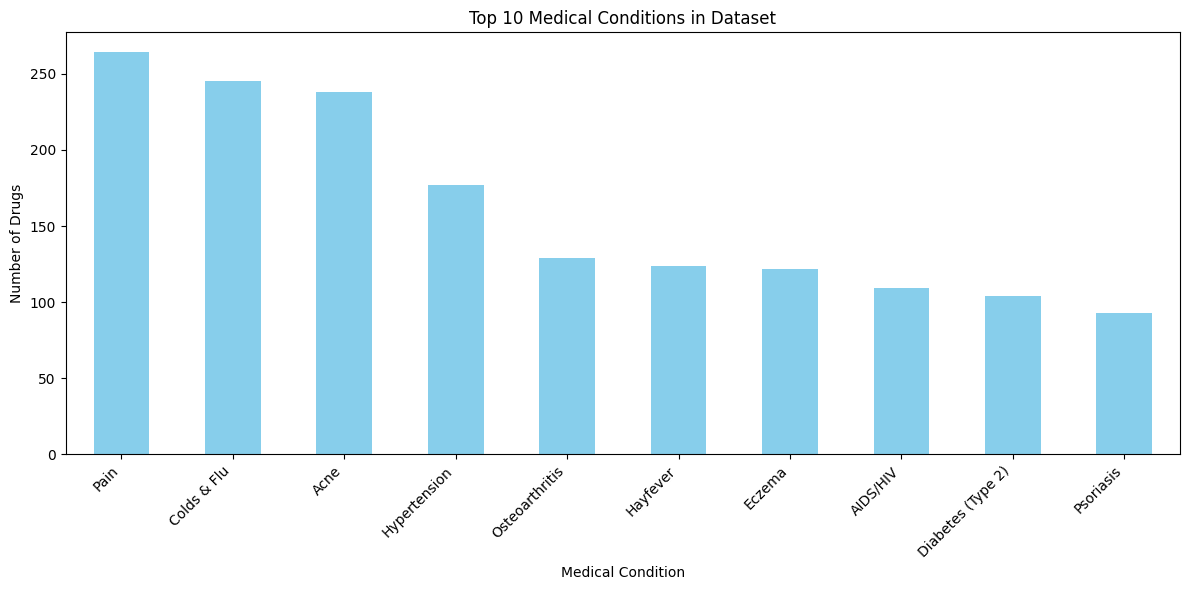

In [15]:
# Creating a bar plot for top 10 medical conditions
plt.figure(figsize=(12, 6))
medical_condition_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Medical Conditions in Dataset')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Analyzing the rating distribution excluding zero values
ratings_non_zero = data[data['rating'] > 0]['rating']
print(f"Average rating (excluding 0s): {ratings_non_zero.mean():.2f}")
print(f"Median rating (excluding 0s): {ratings_non_zero.median():.2f}")
print(f"Minimum rating: {ratings_non_zero.min():.2f}")
print(f"Maximum rating: {ratings_non_zero.max():.2f}")
print()
print("Rating distribution:")
print(data['rating'].value_counts().sort_index())

Average rating (excluding 0s): 6.93
Median rating (excluding 0s): 7.05
Minimum rating: 1.00
Maximum rating: 10.00

Rating distribution:
rating
0.0     1371
1.0       44
1.1        1
1.5        1
1.7        1
        ... 
9.6        6
9.7       15
9.8        5
9.9        1
10.0     153
Name: count, Length: 86, dtype: int64


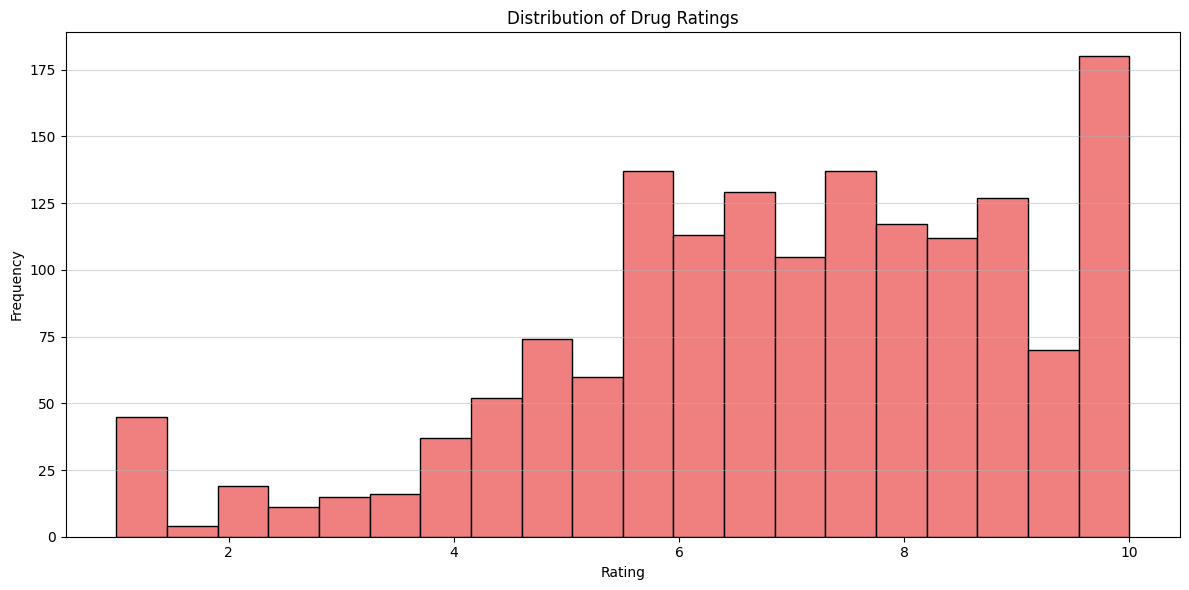

In [17]:
# Plotting the distribution of ratings excluding zeros
plt.figure(figsize=(12, 6))
ratings_non_zero = data[data['rating'] > 0]['rating']
plt.hist(ratings_non_zero, bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Distribution of prescription types:
rx_otc
Rx         1998
Rx/OTC      604
OTC         328
Unknown       1
Name: count, dtype: int64



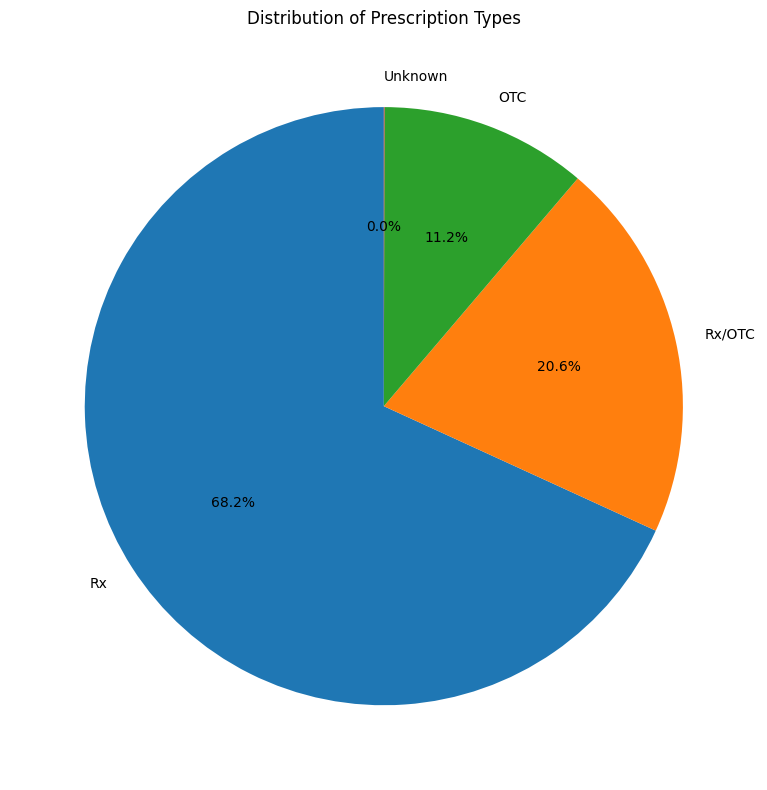

In [18]:
# Checking the distribution of prescription types
rx_otc_counts = data['rx_otc'].value_counts()
print("Distribution of prescription types:")
print(rx_otc_counts)
print()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rx_otc_counts, labels=rx_otc_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Prescription Types')
plt.tight_layout()
plt.show()

Distribution of pregnancy categories:
pregnancy_category
C          1382
B           509
N           436
Unknown     229
D           228
X           129
A            18
Name: count, dtype: int64



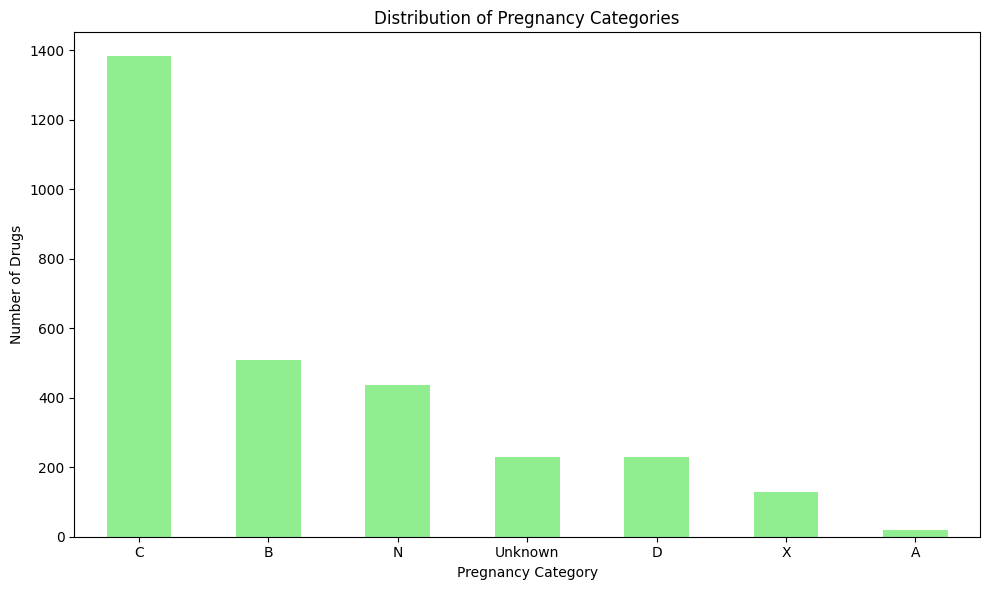

In [19]:
# Analyzing pregnancy category distribution
pregnancy_counts = data['pregnancy_category'].value_counts()
print("Distribution of pregnancy categories:")
print(pregnancy_counts)
print()

# Creating a bar plot
plt.figure(figsize=(10, 6))
pregnancy_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Pregnancy Categories')
plt.xlabel('Pregnancy Category')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Distribution of CSA schedules:
csa
N    2688
2     101
4      71
3      26
5      20
M      16
U       9
Name: count, dtype: int64



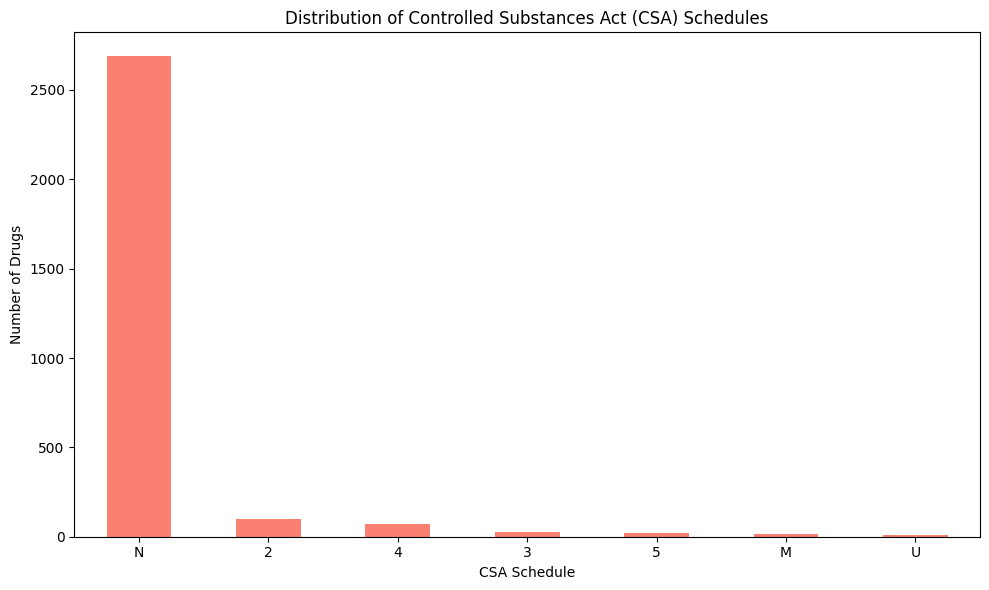

In [20]:
# Analyzing controlled substances act schedule distribution
csa_counts = data['csa'].value_counts()
print("Distribution of CSA schedules:")
print(csa_counts)
print()

# Creating a bar plot
plt.figure(figsize=(10, 6))
csa_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Controlled Substances Act (CSA) Schedules')
plt.xlabel('CSA Schedule')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

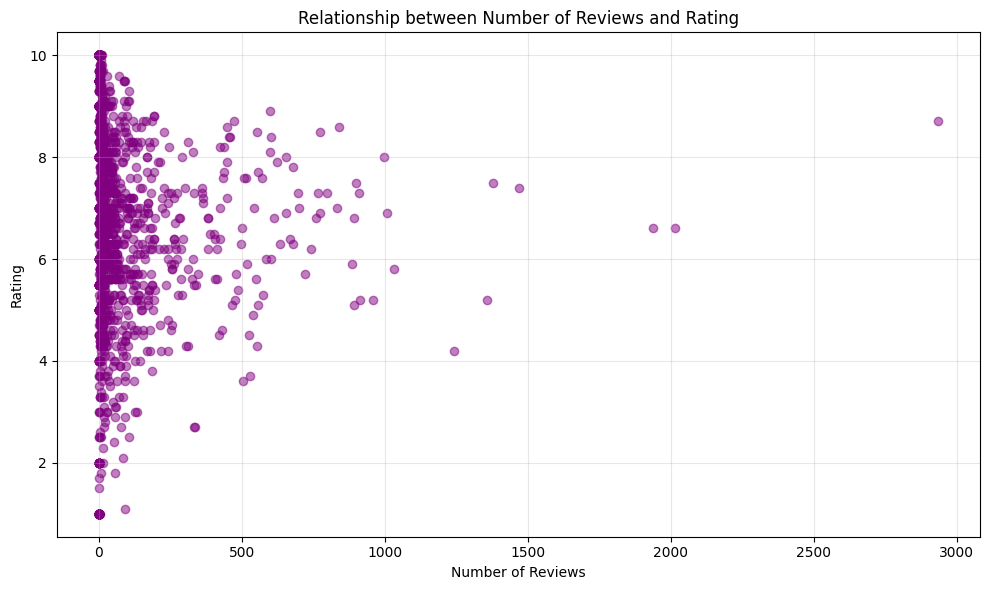

Correlation between rating and number of reviews:
                 rating  no_of_reviews
rating         1.000000      -0.069632
no_of_reviews -0.069632       1.000000


In [21]:
# Analyzing the relationship between ratings and number of reviews
# Filtering out rows where rating is 0
data_with_ratings = data[data['rating'] > 0]

plt.figure(figsize=(10, 6))
plt.scatter(data_with_ratings['no_of_reviews'], data_with_ratings['rating'], alpha=0.5, color='purple')
plt.title('Relationship between Number of Reviews and Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculating correlation
correlation = data_with_ratings[['rating', 'no_of_reviews']].corr()
print("Correlation between rating and number of reviews:")
print(correlation)

In [22]:
# Analyzing the most common drug classes
drug_classes_counts = data['drug_classes'].value_counts()
print("Top 15 drug classes:")
print(drug_classes_counts.head(15))
print()
print(f"Total unique drug classes: {data['drug_classes'].nunique()}")

Top 15 drug classes:
drug_classes
Upper respiratory combinations          245
Topical steroids                         94
Topical acne agents                      88
Unknown                                  82
Nonsteroidal anti-inflammatory drugs     70
Topical rubefacient                      56
Miscellaneous topical agents             56
Antihistamines                           55
Topical anesthetics                      54
Laxatives                                53
Opioids (narcotic analgesics)            51
Antiviral combinations                   50
Insulin                                  50
Analgesic combinations                   49
Antidiabetic combinations                41
Name: count, dtype: int64

Total unique drug classes: 275


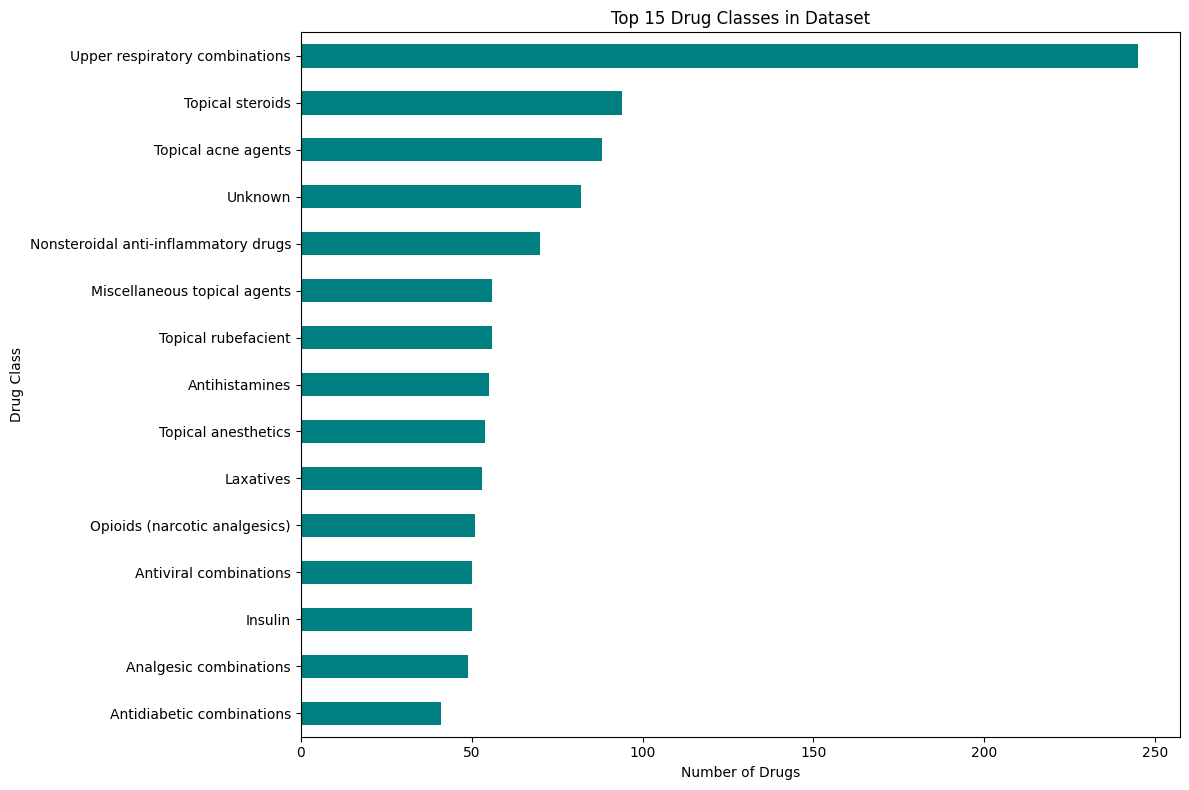

In [23]:
# Creating a horizontal bar plot for better readability
plt.figure(figsize=(12, 8))
drug_classes_counts.head(15).sort_values().plot(kind='barh', color='teal')
plt.title('Top 15 Drug Classes in Dataset')
plt.xlabel('Number of Drugs')
plt.ylabel('Drug Class')
plt.tight_layout()
plt.show()

In [24]:
# Calculating average rating for each medical condition
# Only considering drugs with ratings greater than 0
data_with_ratings = data[data['rating'] > 0]
avg_rating_by_condition = data_with_ratings.groupby('medical_condition')['rating'].mean().sort_values(ascending=False)

print("Top 15 medical conditions by average rating:")
print(avg_rating_by_condition.head(15).round(2))
print()
print("Bottom 15 medical conditions by average rating:")
print(avg_rating_by_condition.tail(15).round(2))

Top 15 medical conditions by average rating:
medical_condition
Swine Flu               8.65
Gout                    8.52
Eczema                  8.27
Angina                  8.24
Pneumonia               8.03
Stroke                  7.87
Anxiety                 7.80
Migraine                7.69
Herpes                  7.69
Acne                    7.63
Weight Loss             7.57
Constipation            7.54
Erectile Dysfunction    7.53
Seizures                7.46
Asthma                  7.46
Name: rating, dtype: float64

Bottom 15 medical conditions by average rating:
medical_condition
Diarrhea             6.70
Bipolar Disorder     6.68
Schizophrenia        6.45
Hypertension         6.34
Alzheimer's          6.32
Hypothyroidism       5.89
Cholesterol          5.87
Diabetes (Type 2)    5.80
Incontinence         5.70
Cancer               5.50
Bronchitis           5.49
Hair Loss            5.28
Allergies            5.23
Osteoporosis         5.08
Covid 19             4.66
Name: rating, dt

In [25]:
# Analyzing drugs that interact with alcohol
alcohol_interaction_counts = data['alcohol'].value_counts()
print("Alcohol interaction distribution:")
print(f"No interaction (0): {alcohol_interaction_counts[0]}")
print(f"Interacts with alcohol (1): {alcohol_interaction_counts[1]}")
print()

# Checking average rating for drugs with and without alcohol interaction
avg_rating_alcohol = data[data['rating'] > 0].groupby('alcohol')['rating'].mean()
print("Average rating by alcohol interaction:")
print(f"No interaction: {avg_rating_alcohol[0]:.2f}")
print(f"Interacts with alcohol: {avg_rating_alcohol[1]:.2f}")

Alcohol interaction distribution:
No interaction (0): 1554
Interacts with alcohol (1): 1377

Average rating by alcohol interaction:
No interaction: 6.87
Interacts with alcohol: 6.98


Correlation matrix:
               activity  rating  no_of_reviews  alcohol
activity          1.000   0.271          0.395    0.014
rating            0.271   1.000          0.218    0.094
no_of_reviews     0.395   0.218          1.000    0.115
alcohol           0.014   0.094          0.115    1.000



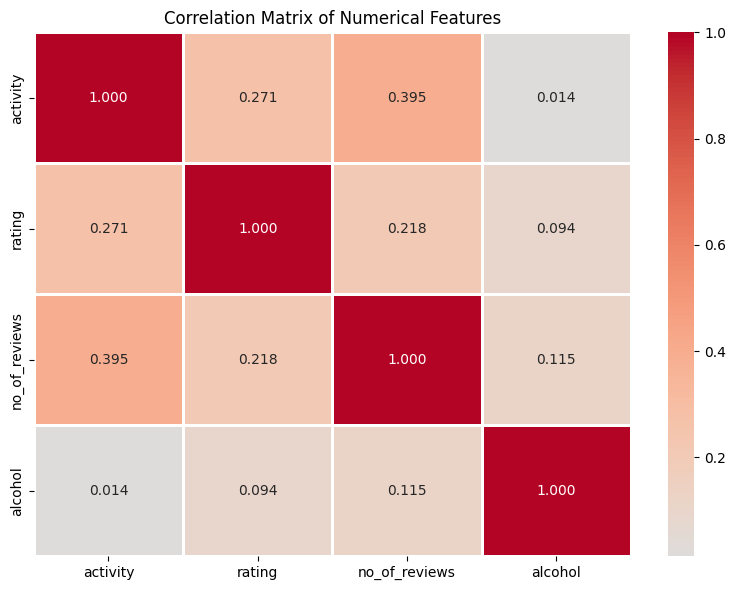

In [26]:
# Creating a correlation matrix for numerical columns
numerical_cols = ['activity', 'rating', 'no_of_reviews', 'alcohol']
correlation_matrix = data[numerical_cols].corr()

print("Correlation matrix:")
print(correlation_matrix.round(3))
print()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f', linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

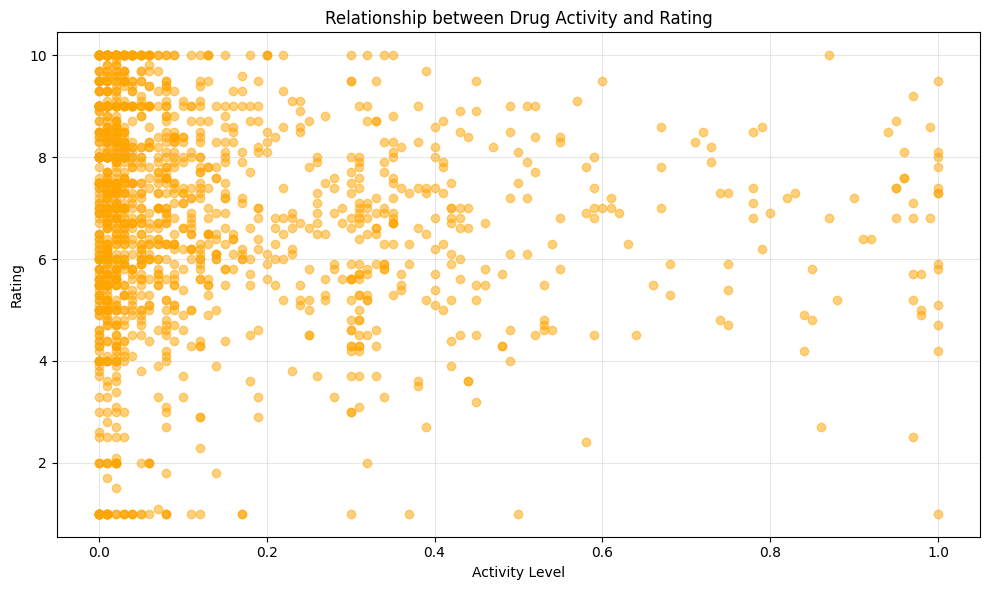

Correlation between activity and rating: -0.092


In [27]:
# Analyzing the relationship between activity and rating
data_with_ratings = data[data['rating'] > 0]

plt.figure(figsize=(10, 6))
plt.scatter(data_with_ratings['activity'], data_with_ratings['rating'], alpha=0.5, color='orange')
plt.title('Relationship between Drug Activity and Rating')
plt.xlabel('Activity Level')
plt.ylabel('Rating')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation between activity and rating: {data_with_ratings[['activity', 'rating']].corr().iloc[0, 1]:.3f}")

In [28]:
# Saving the cleaned dataset to my Google Drive
output_path = '/content/drive/MyDrive/UM_Drugs_Side_Effects_and_Medical_Conditions/drugs_cleaned.csv'
data.to_csv(output_path, index=False)

print(f"Cleaned dataset saved successfully!")
print(f"Location: {output_path}")
print(f"Shape: {data.shape}")
print(f"Total missing values: {data.isnull().sum().sum()}")

Cleaned dataset saved successfully!
Location: /content/drive/MyDrive/UM_Drugs_Side_Effects_and_Medical_Conditions/drugs_cleaned.csv
Shape: (2931, 16)
Total missing values: 0


In [29]:
# Creating a summary report of my analysis
print("DATA ANALYSIS SUMMARY REPORT")
print()
print("Dataset Overview:")
print(f"  - Total drugs: {data.shape[0]}")
print(f"  - Total features: {data.shape[1]}")
print(f"  - Medical conditions covered: {data['medical_condition'].nunique()}")
print(f"  - Unique drug classes: {data['drug_classes'].nunique()}")
print()
print("Rating Statistics:")
print(f"  - Drugs with ratings: {(data['rating'] > 0).sum()}")
print(f"  - Average rating: {data[data['rating'] > 0]['rating'].mean():.2f}")
print(f"  - Highest rated condition: {avg_rating_by_condition.index[0]} ({avg_rating_by_condition.iloc[0]:.2f})")
print(f"  - Lowest rated condition: {avg_rating_by_condition.index[-1]} ({avg_rating_by_condition.iloc[-1]:.2f})")
print()
print("Prescription Types:")
print(f"  - Prescription only (Rx): {(data['rx_otc'] == 'Rx').sum()}")
print(f"  - Over-the-counter (OTC): {(data['rx_otc'] == 'OTC').sum()}")
print(f"  - Both (Rx/OTC): {(data['rx_otc'] == 'Rx/OTC').sum()}")
print()
print("Safety Information:")
print(f"  - Drugs with alcohol interaction: {(data['alcohol'] == 1).sum()}")
print(f"  - Controlled substances (CSA 2-5): {data[data['csa'].isin(['2', '3', '4', '5'])].shape[0]}")
print()
print("Most Common:")
print(f"  - Medical condition: {data['medical_condition'].value_counts().index[0]} ({data['medical_condition'].value_counts().iloc[0]} drugs)")
print(f"  - Drug class: {drug_classes_counts.index[0]} ({drug_classes_counts.iloc[0]} drugs)")

DATA ANALYSIS SUMMARY REPORT

Dataset Overview:
  - Total drugs: 2931
  - Total features: 16
  - Medical conditions covered: 47
  - Unique drug classes: 275

Rating Statistics:
  - Drugs with ratings: 1560
  - Average rating: 6.93
  - Highest rated condition: Swine Flu (8.65)
  - Lowest rated condition: Covid 19 (4.66)

Prescription Types:
  - Prescription only (Rx): 1998
  - Over-the-counter (OTC): 328
  - Both (Rx/OTC): 604

Safety Information:
  - Drugs with alcohol interaction: 1377
  - Controlled substances (CSA 2-5): 218

Most Common:
  - Medical condition: Pain (264 drugs)
  - Drug class: Upper respiratory combinations (245 drugs)


In [30]:
# Finding the top 10 most reviewed drugs
top_reviewed = data[data['no_of_reviews'] > 0].nlargest(10, 'no_of_reviews')[['drug_name', 'medical_condition', 'rating', 'no_of_reviews']]

print("Top 10 Most Reviewed Drugs:")
print(top_reviewed.to_string(index=False))

Top 10 Most Reviewed Drugs:
             drug_name medical_condition  rating  no_of_reviews
           phentermine       Weight Loss     8.7         2934.0
bupropion / naltrexone       Weight Loss     6.6         2013.0
              Contrave       Weight Loss     6.6         1939.0
          escitalopram           Anxiety     7.4         1471.0
               Saxenda       Weight Loss     7.5         1377.0
             bisacodyl      Constipation     5.2         1357.0
        nitrofurantoin               UTI     4.2         1242.0
             buspirone           Anxiety     5.8         1034.0
              zolpidem          Insomnia     6.9         1008.0
          isotretinoin              Acne     8.0          999.0


In [31]:
# Finding highest rated drugs that have at least 50 reviews
high_rated = data[(data['no_of_reviews'] >= 50) & (data['rating'] > 0)].nlargest(10, 'rating')[['drug_name', 'medical_condition', 'rating', 'no_of_reviews']]

print("Top 10 Highest Rated Drugs (with at least 50 reviews):")
print(high_rated.to_string(index=False))

Top 10 Highest Rated Drugs (with at least 50 reviews):
                                            drug_name medical_condition  rating  no_of_reviews
                                              Demerol              Pain     9.6           70.0
                                             Stribild          AIDS/HIV     9.5           89.0
cobicistat / elvitegravir / emtricitabine / tenofovir          AIDS/HIV     9.5           89.0
                                           meperidine              Pain     9.5           93.0
                                             tramadol           Anxiety     9.3          106.0
                                              Atripla          AIDS/HIV     9.1          103.0
                efavirenz / emtricitabine / tenofovir          AIDS/HIV     9.1          107.0
                                             Treximet          Migraine     9.1           89.0
                                         frovatriptan          Migraine     9.1           

Average rating by pregnancy category:
pregnancy_category
N          7.31
C          7.00
D          6.96
X          6.86
B          6.81
Unknown    6.36
A          5.89
Name: rating, dtype: float64



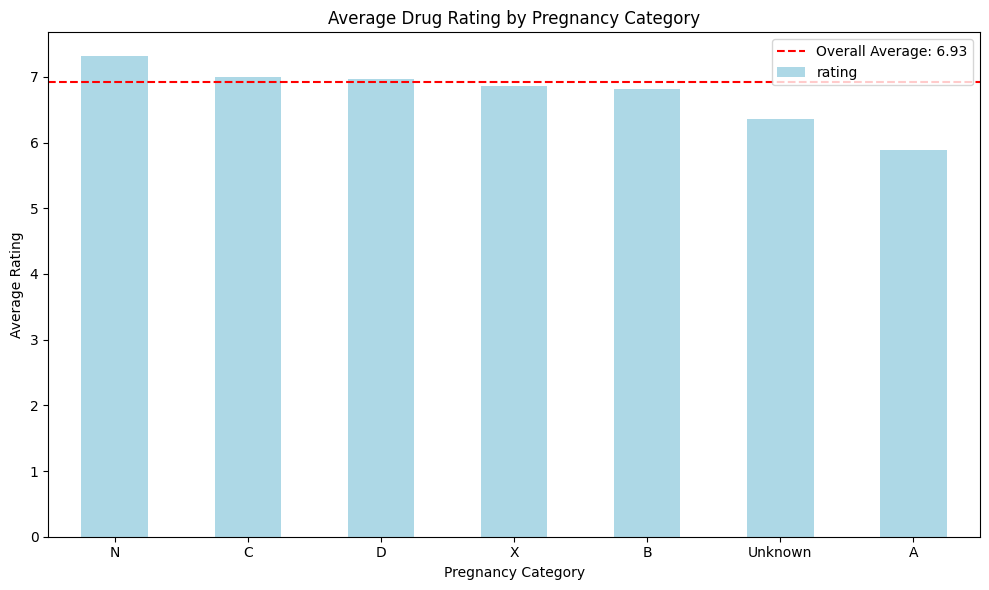

In [32]:
# Analyzing average ratings by pregnancy category
data_with_ratings = data[data['rating'] > 0]
avg_rating_pregnancy = data_with_ratings.groupby('pregnancy_category')['rating'].mean().sort_values(ascending=False)

print("Average rating by pregnancy category:")
print(avg_rating_pregnancy.round(2))
print()

# Creating a bar plot
plt.figure(figsize=(10, 6))
avg_rating_pregnancy.plot(kind='bar', color='lightblue')
plt.title('Average Drug Rating by Pregnancy Category')
plt.xlabel('Pregnancy Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.axhline(y=data_with_ratings['rating'].mean(), color='red', linestyle='--', label=f'Overall Average: {data_with_ratings["rating"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

Top 15 medical conditions by total number of reviews:
medical_condition
Acne                    11863
Anxiety                 11516
Weight Loss             11188
Diabetes (Type 2)        8001
ADHD                     7665
Depression               7509
Bipolar Disorder         7478
Pain                     6533
Insomnia                 5696
Hypertension             4360
Migraine                 3701
Constipation             3633
Osteoarthritis           3418
Erectile Dysfunction     2323
Cholesterol              2218
Name: no_of_reviews, dtype: int64



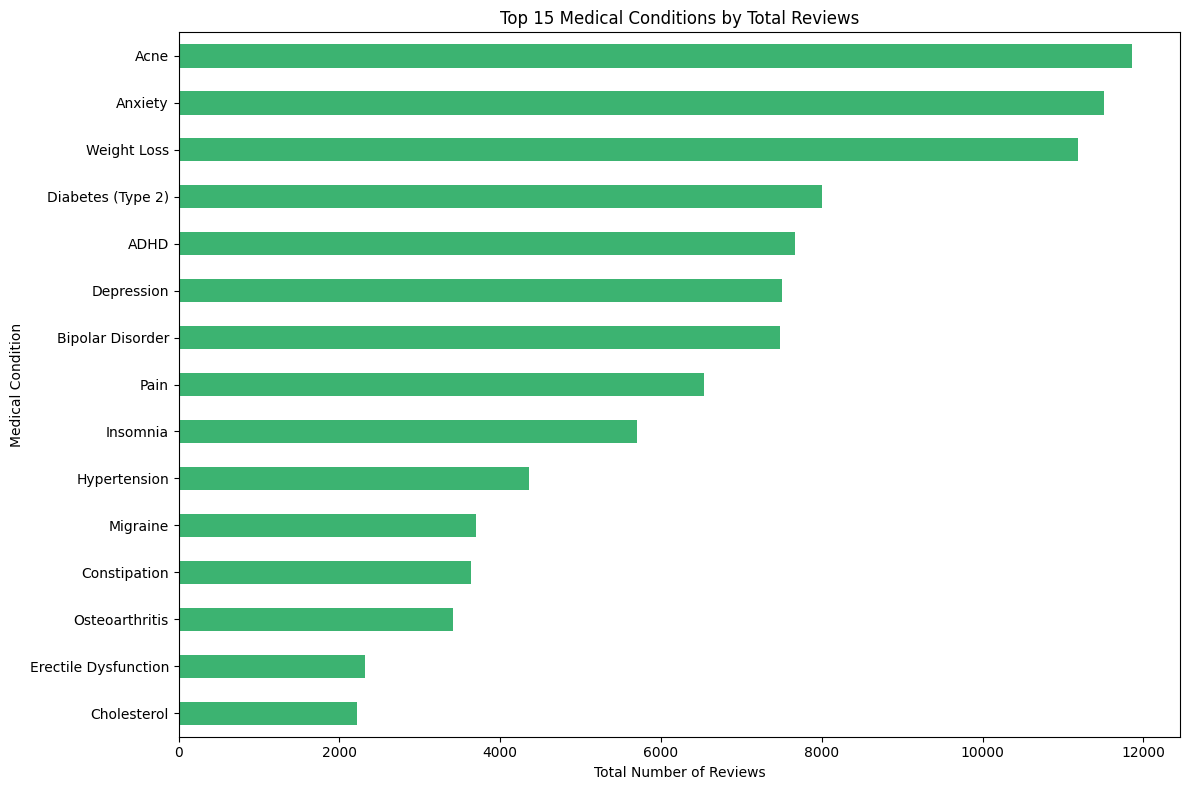

In [33]:
# Analyzing total reviews for each medical condition
data_with_reviews = data[data['no_of_reviews'] > 0]
reviews_by_condition = data_with_reviews.groupby('medical_condition')['no_of_reviews'].sum().sort_values(ascending=False)

print("Top 15 medical conditions by total number of reviews:")
print(reviews_by_condition.head(15).astype(int))
print()

# Creating a horizontal bar plot
plt.figure(figsize=(12, 8))
reviews_by_condition.head(15).sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Top 15 Medical Conditions by Total Reviews')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Medical Condition')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

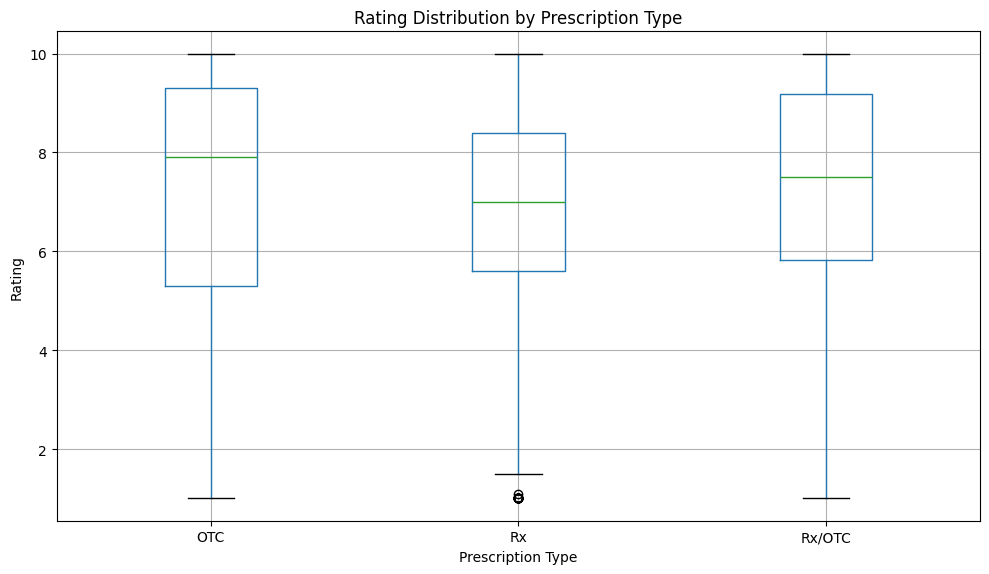

Rating statistics by prescription type:
         count  mean   std  min   25%  50%   75%   max
rx_otc                                                
OTC      105.0  7.08  2.73  1.0  5.30  7.9  9.30  10.0
Rx      1261.0  6.86  2.07  1.0  5.60  7.0  8.40  10.0
Rx/OTC   194.0  7.29  2.30  1.0  5.82  7.5  9.17  10.0


In [34]:
# Creating a boxplot for ratings by prescription type
data_with_ratings = data[data['rating'] > 0]

plt.figure(figsize=(10, 6))
data_with_ratings.boxplot(column='rating', by='rx_otc', figsize=(10, 6))
plt.title('Rating Distribution by Prescription Type')
plt.suptitle('')
plt.xlabel('Prescription Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Summary statistics
print("Rating statistics by prescription type:")
print(data_with_ratings.groupby('rx_otc')['rating'].describe().round(2))

In [35]:
# Extracting and analyzing common side effects
# Splitting side effects by common delimiters
from collections import Counter
import re

side_effects_list = []
for effect in data[data['side_effects'] != 'Unknown']['side_effects']:
    # Split by semicolons and commas
    effects = re.split(r'[;,]', str(effect))
    for e in effects:
        cleaned = e.strip().lower()
        if cleaned and len(cleaned) > 5:  # Only consider meaningful terms
            side_effects_list.append(cleaned)

# Count most common side effects
side_effect_counter = Counter(side_effects_list)
top_side_effects = side_effect_counter.most_common(20)

print("Top 20 most common side effects:")
for i, (effect, count) in enumerate(top_side_effects, 1):
    print(f"{i}. {effect}: {count}")

Top 20 most common side effects:
1. tongue: 2129
2. swelling of your face: 1713
3. difficult breathing: 1257
4. nausea: 1183
5. vomiting: 1182
6. itching: 1142
7. dizziness: 817
8. diarrhea: 806
9. confusion: 705
10. constipation: 693
11. headache: 623
12. loss of appetite: 605
13. trouble breathing: 590
14. blurred vision: 503
15. wheezing: 498
16. tiredness: 490
17. stomach pain: 488
18. swelling: 468
19. dark urine: 464
20. difficulty breathing: 460


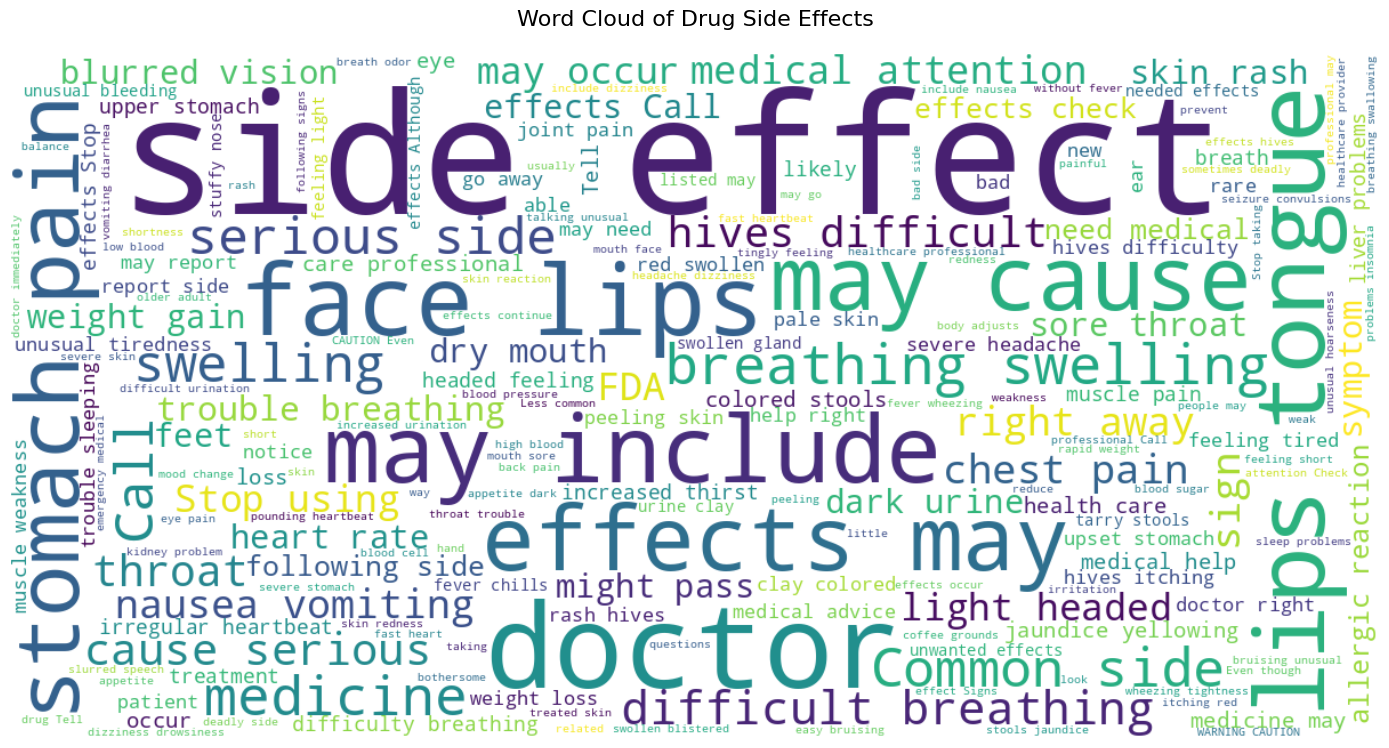

In [36]:
# Creating a word cloud for side effects
from wordcloud import WordCloud

# Combining all side effects into one string
side_effects_text = ' '.join(data[data['side_effects'] != 'Unknown']['side_effects'].astype(str))

# Creating the word cloud
plt.figure(figsize=(14, 8))
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(side_effects_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Drug Side Effects', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Average rating by CSA schedule:
     mean  count
csa             
4    7.64     60
2    7.53     80
3    7.15     19
N    6.87   1381
5    6.85     11
M    6.12      5
U    4.62      4



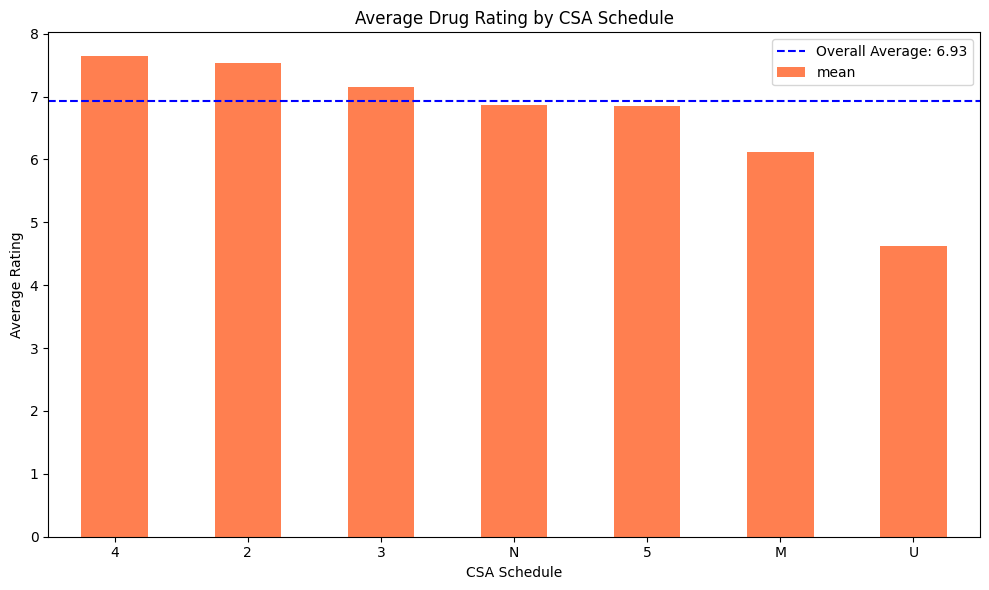

In [37]:
# Analyzing average ratings by CSA schedule
data_with_ratings = data[data['rating'] > 0]
avg_rating_csa = data_with_ratings.groupby('csa')['rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)

print("Average rating by CSA schedule:")
print(avg_rating_csa.round(2))
print()

# Creating a bar plot
plt.figure(figsize=(10, 6))
avg_rating_csa['mean'].plot(kind='bar', color='coral')
plt.title('Average Drug Rating by CSA Schedule')
plt.xlabel('CSA Schedule')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.axhline(y=data_with_ratings['rating'].mean(), color='blue', linestyle='--', label=f'Overall Average: {data_with_ratings["rating"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# Finding drug classes with highest average ratings
# Only considering classes with at least 10 drugs for meaningful results
data_with_ratings = data[data['rating'] > 0]
drug_class_ratings = data_with_ratings.groupby('drug_classes').agg({
    'rating': 'mean',
    'drug_name': 'count'
}).rename(columns={'drug_name': 'count'})

# Filter classes with at least 10 drugs
drug_class_ratings = drug_class_ratings[drug_class_ratings['count'] >= 10].sort_values('rating', ascending=False)

print("Top 15 highest rated drug classes (with at least 10 drugs):")
print(drug_class_ratings.head(15).round(2))

Top 15 highest rated drug classes (with at least 10 drugs):
                                         rating  count
drug_classes                                          
Benzodiazepines                            8.68     17
Topical steroids                           8.34     30
Anticholinergic bronchodilators            8.00     10
Topical acne agents                        7.92     38
Glucocorticoids                            7.91     11
Antimigraine agents                        7.90     29
Opioids (narcotic analgesics)              7.74     40
Tricyclic antidepressants                  7.72     13
Antiviral combinations                     7.71     36
Laxatives                                  7.51     31
Miscellaneous topical agents               7.49     21
Narcotic analgesic combinations            7.45     13
Analgesic combinations                     7.43     23
Selective serotonin reuptake inhibitors    7.28     13
Proton pump inhibitors                     7.25     21


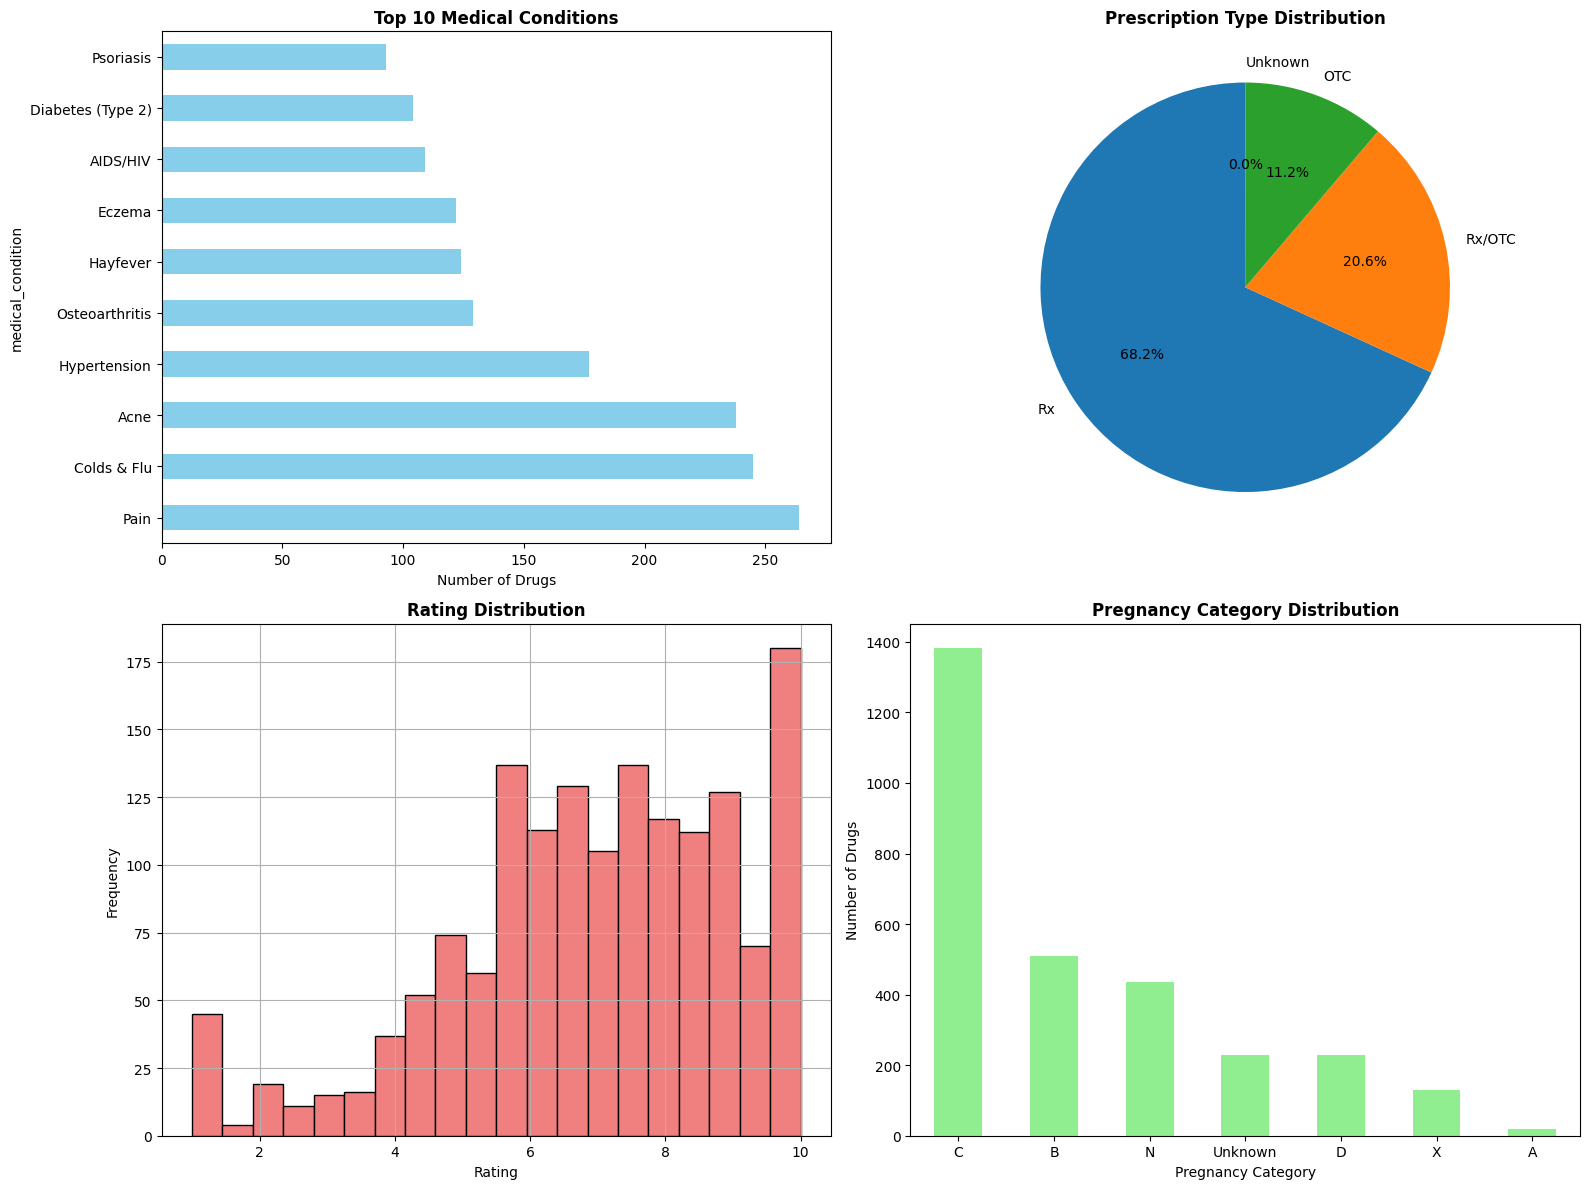

In [39]:
# Creating a comprehensive dashboard with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 10 medical conditions
data['medical_condition'].value_counts().head(10).plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 10 Medical Conditions', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Drugs')

# Plot 2: Prescription type distribution
data['rx_otc'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Prescription Type Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('')

# Plot 3: Rating distribution
data[data['rating'] > 0]['rating'].hist(bins=20, ax=axes[1, 0], color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Rating Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Pregnancy category distribution
data['pregnancy_category'].value_counts().plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Pregnancy Category Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Pregnancy Category')
axes[1, 1].set_ylabel('Number of Drugs')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [40]:
# Generating key insights from the analysis
print("KEY INSIGHTS FROM THE ANALYSIS")
print()

# Insight 1: Most problematic conditions
print("1. MOST TREATED CONDITIONS:")
top_conditions = data['medical_condition'].value_counts().head(5)
for condition, count in top_conditions.items():
    print(f"   - {condition}: {count} drugs available")
print()

# Insight 2: Safety concerns
print("2. SAFETY INSIGHTS:")
alcohol_pct = (data['alcohol'].sum() / len(data)) * 100
print(f"   - {alcohol_pct:.1f}% of drugs interact with alcohol")
controlled = data[data['csa'].isin(['2', '3', '4', '5'])].shape[0]
print(f"   - {controlled} drugs are controlled substances")
high_risk_pregnancy = data[data['pregnancy_category'].isin(['D', 'X'])].shape[0]
print(f"   - {high_risk_pregnancy} drugs are high-risk during pregnancy (Category D or X)")
print()

# Insight 3: User satisfaction
print("3. USER SATISFACTION:")
data_rated = data[data['rating'] > 0]
high_rated = (data_rated['rating'] >= 8).sum()
low_rated = (data_rated['rating'] < 5).sum()
print(f"   - {high_rated} drugs rated 8 or above (highly satisfied)")
print(f"   - {low_rated} drugs rated below 5 (low satisfaction)")
print(f"   - Average rating: {data_rated['rating'].mean():.2f}/10")
print()

# Insight 4: Most reviewed areas
print("4. MOST DISCUSSED CONDITIONS (by review count):")
reviews_by_condition = data[data['no_of_reviews'] > 0].groupby('medical_condition')['no_of_reviews'].sum().sort_values(ascending=False)
for condition in reviews_by_condition.head(5).index:
    print(f"   - {condition}: {int(reviews_by_condition[condition])} total reviews")
print()

# Insight 5: Correlation findings
print("5. KEY CORRELATIONS:")
print(f"   - Activity and Rating correlation: {data[data['rating'] > 0][['activity', 'rating']].corr().iloc[0,1]:.3f}")
print(f"   - Reviews and Rating correlation: {data[data['rating'] > 0][['no_of_reviews', 'rating']].corr().iloc[0,1]:.3f}")
print(f"   - Activity and Reviews correlation: {data[data['rating'] > 0][['activity', 'no_of_reviews']].corr().iloc[0,1]:.3f}")

KEY INSIGHTS FROM THE ANALYSIS

1. MOST TREATED CONDITIONS:
   - Pain: 264 drugs available
   - Colds & Flu: 245 drugs available
   - Acne: 238 drugs available
   - Hypertension: 177 drugs available
   - Osteoarthritis: 129 drugs available

2. SAFETY INSIGHTS:
   - 47.0% of drugs interact with alcohol
   - 218 drugs are controlled substances
   - 357 drugs are high-risk during pregnancy (Category D or X)

3. USER SATISFACTION:
   - 570 drugs rated 8 or above (highly satisfied)
   - 244 drugs rated below 5 (low satisfaction)
   - Average rating: 6.93/10

4. MOST DISCUSSED CONDITIONS (by review count):
   - Acne: 11863 total reviews
   - Anxiety: 11516 total reviews
   - Weight Loss: 11188 total reviews
   - Diabetes (Type 2): 8001 total reviews
   - ADHD: 7665 total reviews

5. KEY CORRELATIONS:
   - Activity and Rating correlation: -0.092
   - Reviews and Rating correlation: -0.070
   - Activity and Reviews correlation: 0.350


COMPARATIVE ANALYSIS: OTC vs Rx DRUGS

OTC (Over-the-Counter) Drugs:
   - Total count: 105
   - Average rating: 7.08
   - Average reviews: 42.2
   - Drugs with alcohol interaction: 31

Rx (Prescription) Drugs:
   - Total count: 1261
   - Average rating: 6.86
   - Average reviews: 85.7
   - Drugs with alcohol interaction: 684



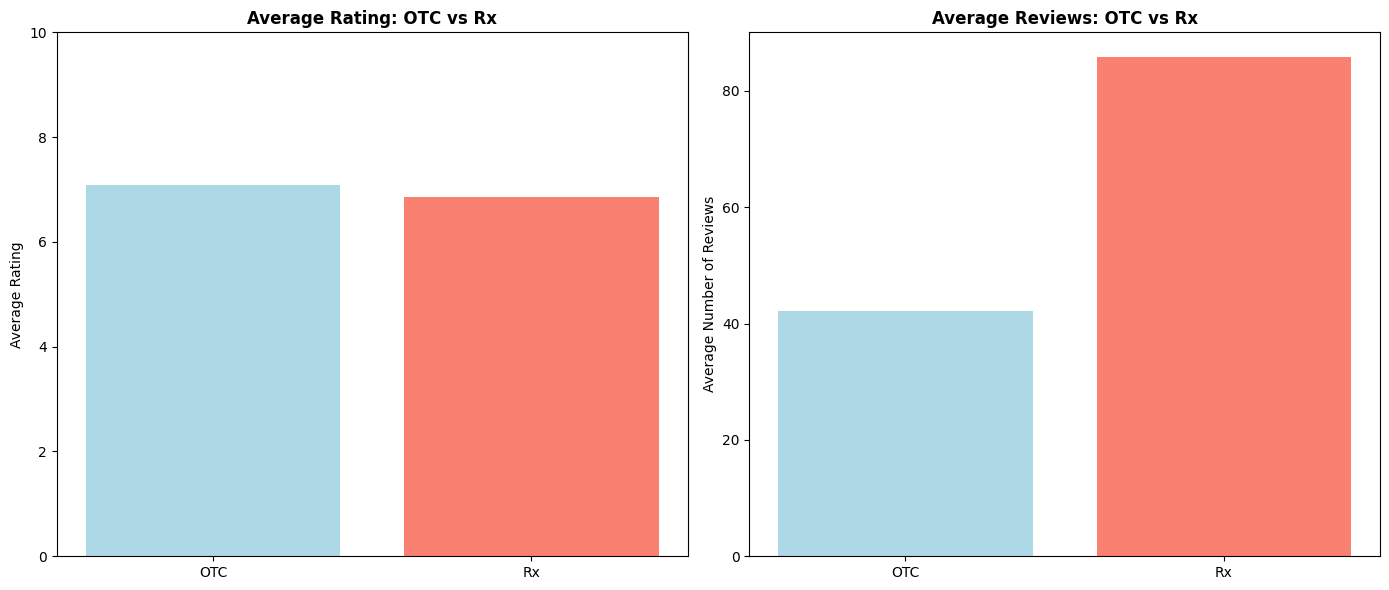

In [41]:
# Comparing OTC and Rx drugs
print("COMPARATIVE ANALYSIS: OTC vs Rx DRUGS")
print()

data_rated = data[data['rating'] > 0]

# Comparing OTC and Rx only
otc_data = data_rated[data_rated['rx_otc'] == 'OTC']
rx_data = data_rated[data_rated['rx_otc'] == 'Rx']

print("OTC (Over-the-Counter) Drugs:")
print(f"   - Total count: {len(otc_data)}")
print(f"   - Average rating: {otc_data['rating'].mean():.2f}")
print(f"   - Average reviews: {otc_data['no_of_reviews'].mean():.1f}")
print(f"   - Drugs with alcohol interaction: {(otc_data['alcohol'] == 1).sum()}")
print()

print("Rx (Prescription) Drugs:")
print(f"   - Total count: {len(rx_data)}")
print(f"   - Average rating: {rx_data['rating'].mean():.2f}")
print(f"   - Average reviews: {rx_data['no_of_reviews'].mean():.1f}")
print(f"   - Drugs with alcohol interaction: {(rx_data['alcohol'] == 1).sum()}")
print()

# Creating comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Rating comparison
rx_types = ['OTC', 'Rx']
avg_ratings = [otc_data['rating'].mean(), rx_data['rating'].mean()]
axes[0].bar(rx_types, avg_ratings, color=['lightblue', 'salmon'])
axes[0].set_title('Average Rating: OTC vs Rx', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Rating')
axes[0].set_ylim(0, 10)

# Review count comparison
avg_reviews = [otc_data['no_of_reviews'].mean(), rx_data['no_of_reviews'].mean()]
axes[1].bar(rx_types, avg_reviews, color=['lightblue', 'salmon'])
axes[1].set_title('Average Reviews: OTC vs Rx', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Number of Reviews')

plt.tight_layout()
plt.show()

In [42]:
# Creating a final summary dataframe for export
summary_stats = {
    'Metric': [
        'Total Drugs',
        'Medical Conditions',
        'Drug Classes',
        'Drugs with Ratings',
        'Average Rating',
        'Drugs with Reviews',
        'Average Reviews',
        'Prescription Only (Rx)',
        'Over-the-Counter (OTC)',
        'Alcohol Interaction',
        'Controlled Substances',
        'High-Risk Pregnancy Drugs'
    ],
    'Value': [
        data.shape[0],
        data['medical_condition'].nunique(),
        data['drug_classes'].nunique(),
        (data['rating'] > 0).sum(),
        round(data[data['rating'] > 0]['rating'].mean(), 2),
        (data['no_of_reviews'] > 0).sum(),
        round(data[data['no_of_reviews'] > 0]['no_of_reviews'].mean(), 1),
        (data['rx_otc'] == 'Rx').sum(),
        (data['rx_otc'] == 'OTC').sum(),
        (data['alcohol'] == 1).sum(),
        data[data['csa'].isin(['2', '3', '4', '5'])].shape[0],
        data[data['pregnancy_category'].isin(['D', 'X'])].shape[0]
    ]
}

summary_df = pd.DataFrame(summary_stats)
print("FINAL SUMMARY STATISTICS")
print(summary_df.to_string(index=False))
print()

# Saving summary to CSV
summary_path = '/content/drive/MyDrive/UM_Drugs_Side_Effects_and_Medical_Conditions/analysis_summary.csv'
summary_df.to_csv(summary_path, index=False)
print(f"Summary statistics saved to: {summary_path}")
print()

print("ANALYSIS COMPLETE!")
print("All cleaned data and summaries have been saved to your Google Drive.")

FINAL SUMMARY STATISTICS
                   Metric   Value
              Total Drugs 2931.00
       Medical Conditions   47.00
             Drug Classes  275.00
       Drugs with Ratings 1560.00
           Average Rating    6.93
       Drugs with Reviews 1586.00
          Average Reviews   75.10
   Prescription Only (Rx) 1998.00
   Over-the-Counter (OTC)  328.00
      Alcohol Interaction 1377.00
    Controlled Substances  218.00
High-Risk Pregnancy Drugs  357.00

Summary statistics saved to: /content/drive/MyDrive/UM_Drugs_Side_Effects_and_Medical_Conditions/analysis_summary.csv

ANALYSIS COMPLETE!
All cleaned data and summaries have been saved to your Google Drive.
